<a href="https://colab.research.google.com/github/ferjorosa/learn-fastai/blob/main/mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST example

## Imports

In [1]:
#hide (Google Colab)
!pip install fastai --upgrade -q
import fastai
print(fastai.__version__)

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 189 kB 6.9 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
2.5.3
     |████████████████████████████████| 720 kB 9.9 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 68.3 MB/s 
     |████████████████████████████████| 51 kB 297 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Data

In [11]:
path = untar_data(URLs.MNIST)

zeros = (path/"training"/"0").ls().sorted()
ones = (path/"training"/"1").ls().sorted()
twos = (path/"training"/"2").ls().sorted()
threes = (path/"training"/"3").ls().sorted()
fours = (path/"training"/"4").ls().sorted()
fives = (path/"training"/"5").ls().sorted()
sixes = (path/"training"/"6").ls().sorted()
sevens = (path/"training"/"7").ls().sorted()
eights = (path/"training"/"8").ls().sorted()
nines = (path/"training"/"9").ls().sorted()

In [12]:
zero_tensors = [tensor(Image.open(o)) for o in zeros]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]

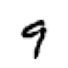

In [35]:
show_image(nine_tensors[2])

In [27]:
nine_tensors[0].shape[0]

28

In [37]:
img_dim = nine_tensors[0].shape[0]**2

stacked_zeros = torch.stack(zero_tensors).view(-1, img_dim).float()/255
stacked_ones = torch.stack(one_tensors).view(-1, img_dim).float()/255
stacked_twos = torch.stack(two_tensors).view(-1, img_dim).float()/255
stacked_threes = torch.stack(three_tensors).view(-1, img_dim).float()/255
stacked_fours = torch.stack(four_tensors).view(-1, img_dim).float()/255
stacked_fives = torch.stack(five_tensors).view(-1, img_dim).float()/255
stacked_sixes = torch.stack(six_tensors).view(-1, img_dim).float()/255
stacked_sevens = torch.stack(seven_tensors).view(-1, img_dim).float()/255
stacked_eights = torch.stack(eight_tensors).view(-1, img_dim).float()/255
stacked_nines = torch.stack(nine_tensors).view(-1, img_dim).float()/255

stacked_eights.shape

torch.Size([5851, 784])

In [47]:
data_x =torch.cat([stacked_zeros, 
                   stacked_ones,
                   stacked_twos, 
                   stacked_threes,
                   stacked_fours,
                   stacked_fives,
                   stacked_sixes,
                   stacked_sevens,
                   stacked_eights,
                   stacked_nines])

data_y = torch.cat([torch.tensor([0] * len(stacked_zeros)), 
                    torch.tensor([1] * len(stacked_ones)),
                    torch.tensor([2] * len(stacked_twos)),
                    torch.tensor([3] * len(stacked_threes)),
                    torch.tensor([4] * len(stacked_fours)),
                    torch.tensor([5] * len(stacked_fives)),
                    torch.tensor([6] * len(stacked_sixes)),
                    torch.tensor([7] * len(stacked_sevens)),
                    torch.tensor([8] * len(stacked_eights)),
                    torch.tensor([9] * len(stacked_nines))]).unsqueeze(1)

(data_x.shape, data_y.shape)

(torch.Size([60000, 784]), torch.Size([60000, 1]))

#### Divide training data into "train" and "validation"

In order to do it we are going to sample (without replacement) a number of integer values from 0 to 60000. Then select those data instances as the validation data, and the rest of data instances as the training data.


In [52]:
n_data = data_x.shape[0]
n_val = 5000

val_indices = np.random.choice(n_data, n_val, replace=False)
val_mask = np.zeros(n_data, bool)
val_mask[val_indices] = True
val_data_x = data_x[val_mask]
train_data_x = data_x[~val_mask]
val_data_x.shape, train_data_x.shape

(torch.Size([5000, 784]), torch.Size([55000, 784]))